# **Trabalho EIACD 2**
### "Data exploration and enrichment for supervised classification"
###### Trabalho realizado por: Cristiana Silva, Filipa Marinha e Filipa Ferreira

# Índice
#### 1. Introdução
#### 2. Bibliotecas utilizadas
#### 3. Formulação do problema
#### 4. Exploração de dados
- observações gerais
- identificação de dados "?"
- identificação de dados nulos
- gráficos acerca de diversos parâmetros avaliados no dataset

#### 5. Pré-processamento de dados
- eliminação de dados desconhecidos
- substituição de "?" (dados em falta) por médias
- guardar os dados pré-processados

#### 6. Modelação de dados
#### 7. Classificação (algoritmos)
- Teste 1
- Teste 2
- Teste 3 (com grid search)
- Teste 4

#### 8. Comparar resultados
#### 9. Conclusão



# Introdução
[[voltar ao índice]](#Indice)
###### A ciência de dados tornou-se um domínio indispensável para extrair informações valiosas e tomar decisões informadas a partir de grandes quantidades de dados.
###### Neste projeto, o objetivo é abordar um caso de uso real desta ciência, desde a limpeza de dados e avaliação de recursos até a inspeção visual e comunicação de resultados, utilizando o 'Hepatocellular Carcinoma Dataset'. Para o efeito, foi essencial o desenvolvimento de uma machine learning pipeline com a capacidade de determinar a sobrevivência dos pacientes após 1 ano de diagnóstico (este método será capaz de ditar se o paciente sobrevive ou morre).
---

# Import das bibliotecas utilizadas

In [ ]:
import time
from collections import OrderedDict
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import pandas as pd
import seaborn as sns
import copy

###### Recomenda-se a utilização da Anaconda Python distribution para a visualização deste projeto, dado que este permite o acesso às diversas bibliotecas Python usadas.
###### As principais bibliotecas usadas são:
- Numpy: permite realizar uma grande variedade de operações matemáticas em matrizes.
- Pandas: possibilita uma análise e manipulação de dados mais eficientemente
- Scikit-learn: dispõe de ferramentas simples e eficientes para análise preditiva de dados.
- Matplotlib: destina-se à criação de gráficos e à visualização de dados em geral
- Seaborn: fornece uma interface de alto nível, trabalhando em simultâneo com o Matplotlib.


---

# Formulação do problema
[[voltar ao índice]](#Indice)
###### O objetivo deste trabalho é prever certas condições em pacientes (inclusive se o paciente 'lives' ou 'dies') com base no dataset do 'Hepatocellular Carcinoma' fornecido. Para este efeito, será realizada uma análise exploratória dos dados do dataset e, posteriormente aplicados alguns modelos de 'Supervised Learning', em que nos foram fornecidos os seguintes dados:
- Categorical: gender (male or female), class (lives or dies), PS (active, ambulatory, restricted, selfcare, disable), Encephalophathy (None, Grade I/II, Grade III/IV), Ascites (None, Mild, Moderate/Severe

- Numerical: age, grams_day, packs_year, INR, AFP, hemoglobin, MCV, leucocytes, platelets, albumin, total_bil, ALT, AST, GGT, ALP, TP, creatinine, nodules, major_dim, dir_bil, iron, sat, ferritin

- Boolean: symptoms, alcohol, HBsAg, HBeAg, HBcAb, HCVAb, Cirrhosis, Endemic, Smoking, Diabetes, Obesity, Hemochro, AHT, CRI, HIV, NASH, Varices, Spleno, PHT, PVT, Metastasis, Hallmark

###### Os dados apresentados como 'Boolean' são na verdade expressos como 'Yes' ou 'No' invés de 'True' ou 'False'.Para além disso, todas as categorias apresentadas estão sujeitas a alguns valores em falta.
###### Por fim, visto que estamos a realizar uma 'classificação', podemos comprovar o quão precisos foram os resultados de modo a avaliar a eficácia dos métodos usados.

---

## Exploração de dados
[[voltar ao índice]](#Indice)
###### Esta etapa destina-se à examinação  dos dados, tendo como objetico identificar a existência de erros e a relevância dos dados recolhidos, devendo estes ser identificados e posteriormente retificados ou eliminados.

In [ ]:
df = pd.read_csv("hcc_dataset.csv", sep = ",")
# Leitura do ficheiro

### Observações gerais

In [ ]:
df.shape

(165, 50)

Através do comando "shape", é possível contemplar que existem, no total, 165 pacientes e 50 critérios de classificação.

In [ ]:
categories = []
for category in df:
  categories.append(category)
print(categories)

['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS', 'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin', 'Class']


Lista de todos os critérios presentes no dataset.

In [ ]:
df["Age"].mean()

64.69090909090909

Média das idades dos pacientes.

In [ ]:
df.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,...,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,6.9,1.8,1,9,?,59,15,22,Lives


Aqui, é-nos apresentada uma simplificação da estrutura geral do ficheiro, encontrando-se presentes os diferentes tipos de dados identificados na formulação do problema.

Ressalta-se a existência de células com informação desconhecida, ou seja, preenchidas por "?". Estas terão que ser sujeitas a diversos processos de modo a não interferir com a leitura dos dados.

Por exemplo, uma sugestão a seguir é a substituição de incógnitas nas categorias numéricas pela média das mesmas.

In [ ]:
for category in df:
  print(df[category].value_counts())

Gender
Male      133
Female     32
Name: count, dtype: int64
Symptoms
Yes    94
No     53
?      18
Name: count, dtype: int64
Alcohol
Yes    122
No      43
Name: count, dtype: int64
HBsAg
No     132
?       17
Yes     16
Name: count, dtype: int64
HBeAg
No     125
?       39
Yes      1
Name: count, dtype: int64
HBcAb
No     103
Yes     38
?       24
Name: count, dtype: int64
HCVAb
No     122
Yes     34
?        9
Name: count, dtype: int64
Cirrhosis
Yes    149
No      16
Name: count, dtype: int64
Endemic
No     116
?       39
Yes     10
Name: count, dtype: int64
Smoking
Yes    63
No     61
?      41
Name: count, dtype: int64
Diabetes
No     106
Yes     56
?        3
Name: count, dtype: int64
Obesity
No     135
Yes     20
?       10
Name: count, dtype: int64
Hemochro
No     135
?       23
Yes      7
Name: count, dtype: int64
AHT
No     103
Yes     59
?        3
Name: count, dtype: int64
CRI
No     143
Yes     20
?        2
Name: count, dtype: int64
HIV
No     148
?       14
Yes      3
Nam

A presença de "?" no ficheiro é bastante visível se realizarmos um "value_counts" a todos os critérios de classificação.



### Identificação de dados "?"

In [ ]:
unknown_cat = {}
for category in df.columns:
    count_question_marks = (df[category] == '?').sum()
    unknown_cat[category] = count_question_marks
    print(f"{category}: {count_question_marks}")

Gender: 0
Symptoms: 18
Alcohol: 0
HBsAg: 17
HBeAg: 39
HBcAb: 24
HCVAb: 9
Cirrhosis: 0
Endemic: 39
Smoking: 41
Diabetes: 3
Obesity: 10
Hemochro: 23
AHT: 3
CRI: 2
HIV: 14
NASH: 22
Varices: 52
Spleno: 15
PHT: 11
PVT: 3
Metastasis: 4
Hallmark: 2
Age: 0
Grams_day: 48
Packs_year: 53
PS: 0
Encephalopathy: 1
Ascites: 2
INR: 4
AFP: 8
Hemoglobin: 3
MCV: 3
Leucocytes: 3
Platelets: 3
 Albumin: 6
Total_Bil: 5
ALT: 4
AST: 3
GGT: 3
ALP: 3
TP: 11
Creatinine: 7
Nodules: 2
Major_Dim: 20
Dir_Bil: 44
Iron: 79
Sat: 80
Ferritin: 80
Class: 0


In [ ]:
# dicionário ordenado por ordem crescente
sorted_dict = {k: v for k, v in sorted(unknown_cat.items(), key=lambda item: item[1])}

print(sorted_dict)

{'Gender': 0, 'Alcohol': 0, 'Cirrhosis': 0, 'Age': 0, 'PS': 0, 'Class': 0, 'Encephalopathy': 1, 'CRI': 2, 'Hallmark': 2, 'Ascites': 2, 'Nodules': 2, 'Diabetes': 3, 'AHT': 3, 'PVT': 3, 'Hemoglobin': 3, 'MCV': 3, 'Leucocytes': 3, 'Platelets': 3, 'AST': 3, 'GGT': 3, 'ALP': 3, 'Metastasis': 4, 'INR': 4, 'ALT': 4, 'Total_Bil': 5, ' Albumin': 6, 'Creatinine': 7, 'AFP': 8, 'HCVAb': 9, 'Obesity': 10, 'PHT': 11, 'TP': 11, 'HIV': 14, 'Spleno': 15, 'HBsAg': 17, 'Symptoms': 18, 'Major_Dim': 20, 'NASH': 22, 'Hemochro': 23, 'HBcAb': 24, 'HBeAg': 39, 'Endemic': 39, 'Smoking': 41, 'Dir_Bil': 44, 'Grams_day': 48, 'Varices': 52, 'Packs_year': 53, 'Iron': 79, 'Sat': 80, 'Ferritin': 80}


In [ ]:
# dicionário ordenado por ordem decrescente
reversed_dict_items = reversed(sorted_dict.items())
reversed_dict = {}
for key, value in reversed_dict_items:
    reversed_dict[key] = value
print(reversed_dict)

{'Ferritin': 80, 'Sat': 80, 'Iron': 79, 'Packs_year': 53, 'Varices': 52, 'Grams_day': 48, 'Dir_Bil': 44, 'Smoking': 41, 'Endemic': 39, 'HBeAg': 39, 'HBcAb': 24, 'Hemochro': 23, 'NASH': 22, 'Major_Dim': 20, 'Symptoms': 18, 'HBsAg': 17, 'Spleno': 15, 'HIV': 14, 'TP': 11, 'PHT': 11, 'Obesity': 10, 'HCVAb': 9, 'AFP': 8, 'Creatinine': 7, ' Albumin': 6, 'Total_Bil': 5, 'ALT': 4, 'INR': 4, 'Metastasis': 4, 'ALP': 3, 'GGT': 3, 'AST': 3, 'Platelets': 3, 'Leucocytes': 3, 'MCV': 3, 'Hemoglobin': 3, 'PVT': 3, 'AHT': 3, 'Diabetes': 3, 'Nodules': 2, 'Ascites': 2, 'Hallmark': 2, 'CRI': 2, 'Encephalopathy': 1, 'Class': 0, 'PS': 0, 'Age': 0, 'Cirrhosis': 0, 'Alcohol': 0, 'Gender': 0}


Organizando os dados deste modo, torna-se mais fácil a visualização das colunas com uma grande quantidade de "?".

In [ ]:
mean_unknown_cat = 0
for value in unknown_cat.values():
  mean_unknown_cat += value
print(mean_unknown_cat / 50)

16.52


Média de valores "?" por critério de classificação.

In [ ]:
values_moda = {}
for value in unknown_cat.values():
  if value not in values_moda:
    values_moda[value] = 1
  else:
    values_moda[value] += 1
print(sorted(values_moda.items(), key=lambda x:x[1]))

[(18, 1), (17, 1), (24, 1), (9, 1), (41, 1), (10, 1), (23, 1), (14, 1), (22, 1), (52, 1), (15, 1), (48, 1), (53, 1), (1, 1), (8, 1), (6, 1), (5, 1), (7, 1), (20, 1), (44, 1), (79, 1), (39, 2), (11, 2), (80, 2), (4, 3), (2, 4), (0, 6), (3, 10)]


Moda de valores "?" por critério de classificação.



### Identificação de dados nulos

In [ ]:
df.isnull().sum()

Gender              0
Symptoms            0
Alcohol             0
HBsAg               0
HBeAg               0
HBcAb               0
HCVAb               0
Cirrhosis           0
Endemic             0
Smoking             0
Diabetes            0
Obesity             0
Hemochro            0
AHT                 0
CRI                 0
HIV                 0
NASH                0
Varices             0
Spleno              0
PHT                 0
PVT                 0
Metastasis          0
Hallmark            0
Age                 0
Grams_day           0
Packs_year          0
PS                  0
Encephalopathy    142
Ascites           109
INR                 0
AFP                 0
Hemoglobin          0
MCV                 0
Leucocytes          0
Platelets           0
 Albumin            0
Total_Bil           0
ALT                 0
AST                 0
GGT                 0
ALP                 0
TP                  0
Creatinine          0
Nodules             0
Major_Dim           0
Dir_Bil   

Para além dos "?", existem outras formas de valores nulos aparecerem. Vamos ver em que contexto ocorrem.

In [ ]:
df["Encephalopathy"].value_counts()

Encephalopathy
Grade I/II      18
Grade III/IV     4
?                1
Name: count, dtype: int64

In [ ]:
df["Ascites"].value_counts()

Ascites
Mild               36
Moderate/Severe    18
?                   2
Name: count, dtype: int64

Como é possível verificar, os valores nulos são completamente ocultados do "value_counts". Caso este análise não tivesse sido realizada, estas lacunas passariam despercebidas.

Neste contexto, os dados nulos não representam a ausência de informação, mas indicam que o paciente não possui a doença em questão. Por este motivo, estas colunas não serão eliminadas no pré-processamento.



### Gráficos

Seguem-se alguns gráficos para representar melhor a informação disponibilizada pelo dataset antes de ser realizado o pré-processamento dos dados.

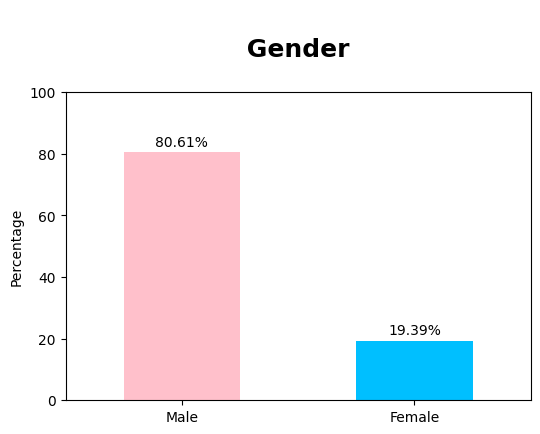

In [ ]:
yes_no_counts = df["Gender"].value_counts()
total_count = yes_no_counts.sum()

# Calculate percentages
percentages = (yes_no_counts / total_count) * 100

plt.figure(figsize=(6, 4))
percentages.plot(kind="bar", color=["pink", "deepskyblue"])
plt.title("\n Gender \n", fontsize=18, fontweight='bold')
plt.ylabel("Percentage")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylim(0, 100)

# Display the percentage value on top of each bar
for index, value in enumerate(percentages):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

Existe uma clara predominância de indivíduos do género masculino em relacão ao feminino.

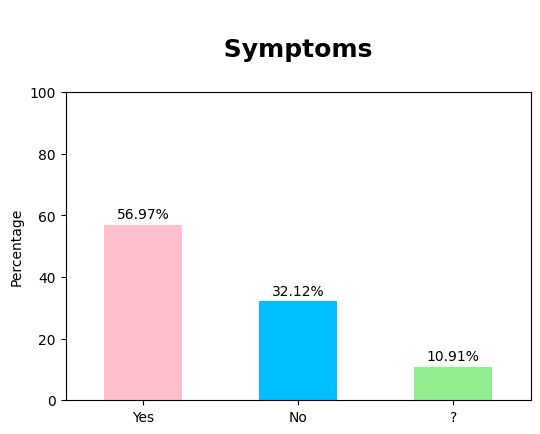

In [ ]:
yes_no_counts = df["Symptoms"].value_counts()
total_count = yes_no_counts.sum()

# Calculate percentages
percentages = (yes_no_counts / total_count) * 100

plt.figure(figsize=(6, 4))
percentages.plot(kind="bar", color=["pink", "deepskyblue", "lightgreen"])
plt.title("\n Symptoms \n", fontsize=18, fontweight='bold')
plt.ylabel("Percentage")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylim(0, 100)

# Display the percentage value on top of each bar
for index, value in enumerate(percentages):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

Apesar de quase 60% dos indivíduos manifestarem sintomas de carcinoma hepatocelular, cerca de 30% são assintomáticos. Tendo em conta que se trata de cancro, é essencial criar mecanismos de diagnósticos eficazes para previnir possíveis mortes que poderiam passar despercebidas.

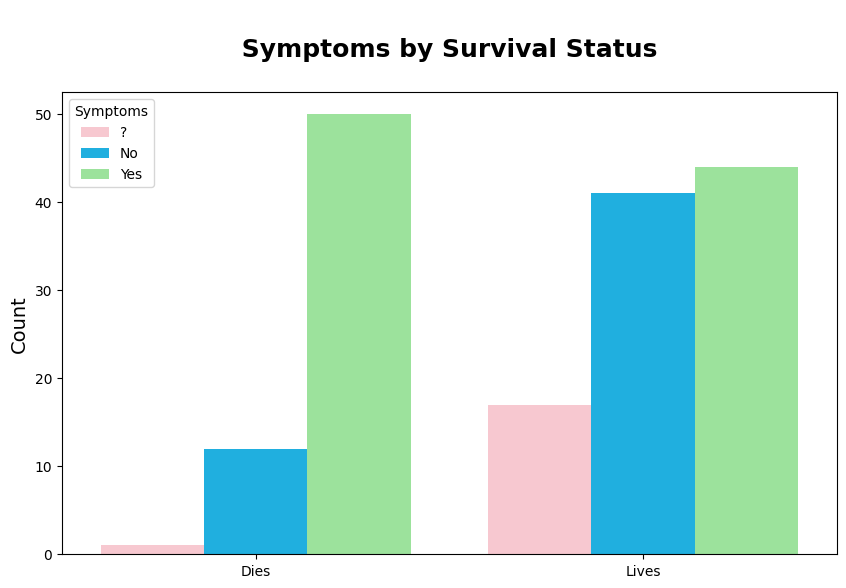

In [ ]:
# Convert 'Symptoms' and 'Class' to categorical if they are not already
df['Symptoms'] = df['Symptoms'].astype('category')
df['Class'] = df['Class'].astype('category')

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', hue='Symptoms', data=df, palette=['pink', 'deepskyblue', 'lightgreen'])

# Adding title and labels
plt.title('\n Symptoms by Survival Status \n', fontsize=18, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()


De acordo com este gráfico, é possível concluir que um paciente com sintomas não possui necessáriamente maior chance de morrer ou viver, mas um assintomático terá, em princípio, uma melhor probabilidade de viver.

Text(0, 0.5, 'Frequency')

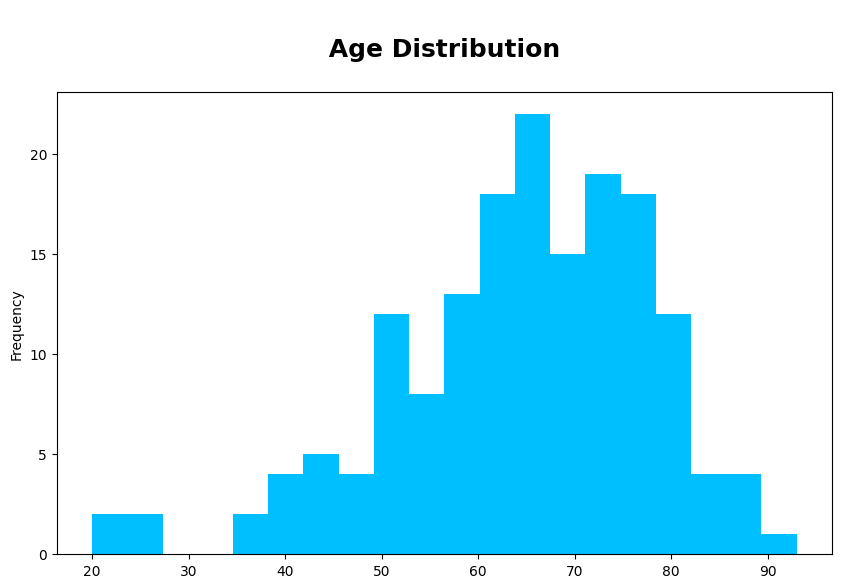

In [ ]:
plt.figure(figsize=(10, 6))
df["Age"].plot(kind = "hist", bins = 20, color = "deepskyblue")
plt.title("\n Age Distribution \n", fontsize = 18, fontweight='bold')
plt.ylabel("Frequency")

A distribuição da idade dos pacientes alinha-se com a média préviamente calculada (65 anos).

<ipython-input-3338-1435e17fc554>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Class', y='Age', data=df, palette=['pink', 'deepskyblue'])


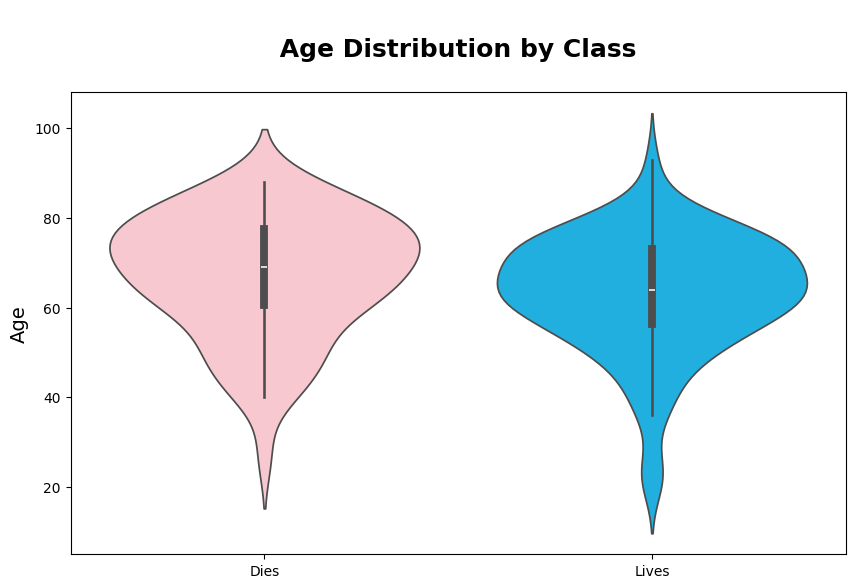

In [ ]:
# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Age', data=df, palette=['pink', 'deepskyblue'])

# Adding title and labels
plt.title('\n Age Distribution by Class \n', fontsize=18, fontweight='bold')
plt.xlabel('')
plt.ylabel('Age', fontsize=14)

# Show the plot
plt.show()

Este "Violin Plot" demonstra que a idade não é um fator com um peso significativo relativamente à chance de vida ou morte do paciente.

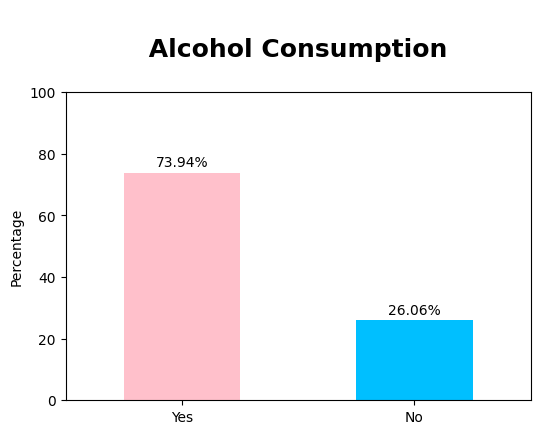

In [ ]:
alcohol_counts = df["Alcohol"].value_counts()
total_count = alcohol_counts.sum()

# Calculate percentages
percentages = (alcohol_counts / total_count) * 100

plt.figure(figsize=(6, 4))
percentages.plot(kind="bar", color=["pink", "deepskyblue"])
plt.title("\n Alcohol Consumption \n", fontsize=18, fontweight='bold')
plt.ylabel("Percentage")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylim(0, 100)

# Display the percentage value on top of each bar
for index, value in enumerate(percentages):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

O consumo de álcool é predominante em cerca de 74% dos pacientes.

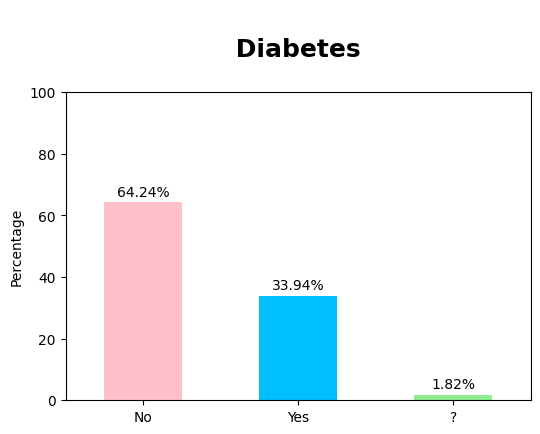

In [ ]:
diabetes_counts = df["Diabetes"].value_counts()
total_count = diabetes_counts.sum()

# Calculate percentages
percentages = (diabetes_counts / total_count) * 100

plt.figure(figsize=(6, 4))
percentages.plot(kind="bar", color=["pink", "deepskyblue", "lightgreen"])
plt.title("\n Diabetes \n", fontsize=18, fontweight='bold')
plt.ylabel("Percentage")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylim(0, 100)

# Display the percentage value on top of each bar
for index, value in enumerate(percentages):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

É possível verificar que a maioria dos pacientes não é diabético.

---


## Pré-processamento de dados
[[voltar ao índice]](#Indice)

Agora que se tem uma noção dos pontos fortes e dos pontos fracos deste dataset, passamos à próxima fase: o pré-processamento.


### Eliminação de dados desconhecidos

Nas análises préviamente realizadas, foi possível verificar que existem algumas colunas com uma grande quantidade de dados desconhecidos.

Nestes casos, a sua eliminação é essencial de modo a não interferir com os resultados. Desta forma para termos uma maior flexibilidade no uso dos algoritmos, vamos eliminar poucos critérios.

In [ ]:
for category in df:
  if unknown_cat[category] > 70:
    del df[category]
df.shape

(165, 47)

Usando este processo, foram eliminadas 3 colunas.

### Substituição de "?" por médias

Como foi previamente observado, existem certas colunas com múltiplos valores marcados por "?".

Perante esta situação, existem várias formas de lidar com a mesma. Para este ficheiro, optou-se por usar a estimação de valores através de uma média. Primeiro, todos os "?" serão substituídos por um valor nulo.

In [ ]:
for category in df:
  df[category].replace('?', np.nan, inplace = True)
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,34,41,183,150,7.1,0.7,1,3.5,0.5,Lives
1,Female,NaN,No,No,No,No,Yes,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1.8,NaN,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,58,68,202,109,7,2.1,5,13,0.1,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,16,64,94,174,8.1,1.11,2,15.7,0.2,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,147,306,173,109,6.9,1.8,1,9,NaN,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,NaN,NaN,NaN,Yes,Yes,No,Yes,...,35,40,449,109,7.6,0.7,5,3,NaN,Lives
161,Female,Yes,No,NaN,NaN,NaN,NaN,Yes,No,No,...,50,91,147,280,6.7,0.7,1,2.2,2.3,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,53,52,164,181,7.5,1.46,5,18.6,NaN,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,50,60,320,170,8.4,0.74,5,18,NaN,Dies


In [ ]:
df.isnull().sum()

Gender              0
Symptoms           18
Alcohol             0
HBsAg              17
HBeAg              39
HBcAb              24
HCVAb               9
Cirrhosis           0
Endemic            39
Smoking            41
Diabetes            3
Obesity            10
Hemochro           23
AHT                 3
CRI                 2
HIV                14
NASH               22
Varices            52
Spleno             15
PHT                11
PVT                 3
Metastasis          4
Hallmark            2
Age                 0
Grams_day          48
Packs_year         53
PS                  0
Encephalopathy    143
Ascites           111
INR                 4
AFP                 8
Hemoglobin          3
MCV                 3
Leucocytes          3
Platelets           3
 Albumin            6
Total_Bil           5
ALT                 4
AST                 3
GGT                 3
ALP                 3
TP                 11
Creatinine          7
Nodules             2
Major_Dim          20
Dir_Bil   

A seguir, vamos converter as colunas numéricas para explicitamente o tipo numérico.

In [ ]:
numerical_columns = ['Age', 'Grams_day', 'Packs_year', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil']
for column in numerical_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [ ]:
for column in df.select_dtypes(include=['number']).columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)
    print(f"Filled NaNs in {column} with mean value {mean_value}")

Filled NaNs in Age with mean value 64.69090909090909
Filled NaNs in Grams_day with mean value 71.00854700854701
Filled NaNs in Packs_year with mean value 20.464285714285715
Filled NaNs in INR with mean value 1.4218509316770187
Filled NaNs in AFP with mean value 19299.951146496816
Filled NaNs in Hemoglobin with mean value 12.87901234567901
Filled NaNs in MCV with mean value 95.11975308641975
Filled NaNs in Leucocytes with mean value 1473.9615493827162
Filled NaNs in Platelets with mean value 113206.442654321
Filled NaNs in  Albumin with mean value 3.445534591194968
Filled NaNs in Total_Bil with mean value 3.0879375000000002
Filled NaNs in ALT with mean value 67.09316770186335
Filled NaNs in AST with mean value 96.38271604938272
Filled NaNs in GGT with mean value 268.02654320987654
Filled NaNs in ALP with mean value 212.2116049382716
Filled NaNs in TP with mean value 8.96103896103896
Filled NaNs in Creatinine with mean value 1.1270886075949367
Filled NaNs in Nodules with mean value 2.736

Para o resto dos valores, usaremos a moda da coluna para substituir os que se encontram em falta, excluíndo as colunas sobre a fase de uma doença.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Gender          165 non-null    object  
 1   Symptoms        147 non-null    category
 2   Alcohol         165 non-null    object  
 3   HBsAg           148 non-null    object  
 4   HBeAg           126 non-null    object  
 5   HBcAb           141 non-null    object  
 6   HCVAb           156 non-null    object  
 7   Cirrhosis       165 non-null    object  
 8   Endemic         126 non-null    object  
 9   Smoking         124 non-null    object  
 10  Diabetes        162 non-null    object  
 11  Obesity         155 non-null    object  
 12  Hemochro        142 non-null    object  
 13  AHT             162 non-null    object  
 14  CRI             163 non-null    object  
 15  HIV             151 non-null    object  
 16  NASH            143 non-null    object  
 17  Varices         

In [ ]:
df['Encephalopathy'].fillna("NA", inplace=True)
df['Ascites'].fillna("NA", inplace=True)

In [ ]:
exclude_columns = ['Encephalopathy', 'Ascites']
for column in df.select_dtypes(include=['object']).columns:
  if column not in exclude_columns:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,34.000000,41.000000,183.000000,150.000000,7.100000,0.700000,1.0,3.5,0.50,Lives
1,Female,NaN,No,No,No,No,Yes,Yes,No,Yes,...,67.093168,96.382716,268.026543,212.211605,8.961039,1.127089,1.0,1.8,1.93,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,58.000000,68.000000,202.000000,109.000000,7.000000,2.100000,5.0,13.0,0.10,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,16.000000,64.000000,94.000000,174.000000,8.100000,1.110000,2.0,15.7,0.20,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,147.000000,306.000000,173.000000,109.000000,6.900000,1.800000,1.0,9.0,1.93,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,No,No,No,Yes,Yes,No,Yes,...,35.000000,40.000000,449.000000,109.000000,7.600000,0.700000,5.0,3.0,1.93,Lives
161,Female,Yes,No,No,No,No,No,Yes,No,No,...,50.000000,91.000000,147.000000,280.000000,6.700000,0.700000,1.0,2.2,2.30,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,53.000000,52.000000,164.000000,181.000000,7.500000,1.460000,5.0,18.6,1.93,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,50.000000,60.000000,320.000000,170.000000,8.400000,0.740000,5.0,18.0,1.93,Dies


Agora, só faltam as colunas "Encephalopathy" e "Ascites". Para essas, vamos substituir o valor nulo por "NA".

In [ ]:
df.isnull().sum()

Gender             0
Symptoms          18
Alcohol            0
HBsAg              0
HBeAg              0
HBcAb              0
HCVAb              0
Cirrhosis          0
Endemic            0
Smoking            0
Diabetes           0
Obesity            0
Hemochro           0
AHT                0
CRI                0
HIV                0
NASH               0
Varices            0
Spleno             0
PHT                0
PVT                0
Metastasis         0
Hallmark           0
Age                0
Grams_day          0
Packs_year         0
PS                 0
Encephalopathy     0
Ascites            0
INR                0
AFP                0
Hemoglobin         0
MCV                0
Leucocytes         0
Platelets          0
 Albumin           0
Total_Bil          0
ALT                0
AST                0
GGT                0
ALP                0
TP                 0
Creatinine         0
Nodules            0
Major_Dim          0
Dir_Bil            0
Class              0
dtype: int64

Agora, vamos verificar se todos os valores já foram devidamente substituídos:

In [ ]:
df.isnull().sum()

Gender             0
Symptoms          18
Alcohol            0
HBsAg              0
HBeAg              0
HBcAb              0
HCVAb              0
Cirrhosis          0
Endemic            0
Smoking            0
Diabetes           0
Obesity            0
Hemochro           0
AHT                0
CRI                0
HIV                0
NASH               0
Varices            0
Spleno             0
PHT                0
PVT                0
Metastasis         0
Hallmark           0
Age                0
Grams_day          0
Packs_year         0
PS                 0
Encephalopathy     0
Ascites            0
INR                0
AFP                0
Hemoglobin         0
MCV                0
Leucocytes         0
Platelets          0
 Albumin           0
Total_Bil          0
ALT                0
AST                0
GGT                0
ALP                0
TP                 0
Creatinine         0
Nodules            0
Major_Dim          0
Dir_Bil            0
Class              0
dtype: int64


Como podemos ver, não existe nenhum valor nulo em qualquer coluna, logo as substituições foram realizadas corretamente.

### Guardar dados pré-processados

Com os dados pré-processados, é essencial guardar uma cópia do documento neste novo estado.

In [ ]:
df.to_csv('hcc_dataset_clean.csv', index=False)

df_clean = pd.read_csv('hcc_dataset_clean.csv')

Agora temos uma cópia limpa dos nossos dados.

---

## Modelação de dados
[[voltar ao índice]](#Indice)

Agora que os nossos dados se encontram organizados, vamos proceder à modelação.

### Substituição por números

Para ser possível a utilização da Decision Tree, é necessário substituir as 'strings' por 'integers'. Vamos ler a versão limpa do nosso ficheiro.

In [ ]:
df_clean = pd.read_csv('hcc_dataset_clean.csv')

In [ ]:
inputs = df_clean.drop("Class", axis="columns")
target = df_clean[["Class"]]

In [ ]:
for category in df_clean:
  if category != "Class":
    le_category = LabelEncoder()

In [ ]:
categories_clean = []
for category in df_clean:
  if category != "Class":
    categories_clean.append(category)
print(categories_clean)

['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS', 'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil']


In [ ]:
for category in df_clean:
  if category != "Class":
    inputs[category + '_n'] = le_category.fit_transform(inputs[category])
inputs.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,Total_Bil_n,ALT_n,AST_n,GGT_n,ALP_n,TP_n,Creatinine_n,Nodules_n,Major_Dim_n,Dir_Bil_n
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,20,20,17,64,49,22,18,1,17,7
1,Female,NaN,No,No,No,No,Yes,Yes,No,Yes,...,30,47,63,86,75,39,51,1,1,24
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,2,39,43,72,30,21,72,6,55,0
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,2,3,40,31,60,32,50,2,59,2
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,5,81,99,58,30,20,69,1,49,24


In [ ]:
inputs_n = inputs.copy()

for category in categories_clean:
  if category != "Class":
    inputs_n = inputs_n.drop(category, axis="columns")
inputs_n.head()

,Gender_n,Symptoms_n,Alcohol_n,HBsAg_n,HBeAg_n,HBcAb_n,HCVAb_n,Cirrhosis_n,Endemic_n,Smoking_n,...,Total_Bil_n,ALT_n,AST_n,GGT_n,ALP_n,TP_n,Creatinine_n,Nodules_n,Major_Dim_n,Dir_Bil_n
0,1,0,1,0,0,0,0,1,0,1,...,20,20,17,64,49,22,18,1,17,7
1,0,2,0,0,0,0,1,1,0,1,...,30,47,63,86,75,39,51,1,1,24
2,1,0,1,1,0,1,0,1,0,1,...,2,39,43,72,30,21,72,6,55,0
3,1,1,1,0,0,0,0,1,0,1,...,2,3,40,31,60,32,50,2,59,2
4,1,1,1,1,0,1,0,1,0,1,...,5,81,99,58,30,20,69,1,49,24


Agora, os dados estão prontos para serem utilizados pelos algoritmos, nomeadamente pela Decision Tree e K-NN em vários testes realizados.

---

## Algoritmos

Em primeiro lugar, criou-se uma função que permite automatizar o processo do cálculo da média do score de cada algoritmo.

In [ ]:
def mean_score(X_test, y_test, it):
  mean_score = 0
  mean_time = 0
  for i in range(0, it - 1):
    time_i = time.time()
    test_score = model.score(X_test, y_test)
    time_f = time.time()
    execution_time = time_f - time_i
    mean_score += test_score
    mean_time += execution_time
  mean_score /= it
  mean_time /= it
  return "test score: {}".format(mean_score), "execution time: {}".format(mean_time)

### Teste 1

Decision Tree

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size= 0.2, random_state= 42)

In [ ]:
# initialize and train the model
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# evaluate the model
time_i = time.time()
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
time_f = time.time()
execution_time = time_f - time_i
print('train score:', train_score)
print('test score:', test_score)
print('execution time:', execution_time)

train score: 1.0
test score: 0.5757575757575758
execution time: 0.027758121490478516


In [ ]:
mean_score(X_test, y_test, 100)

('test score: 0.5700000000000006', 'execution time: 0.007835195064544678')

In [ ]:
# additional evaluation metrics
time_i = time.time()
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classi_report = classification_report(y_test, y_pred)
time_f = time.time()
execution_time = time_f - time_i
print('accuracy score:', acc)
print('confusion matrix:\n', conf_matrix)
print('classification report:\n', classi_report)
print('execution time:', execution_time)

accuracy score: 0.5757575757575758
confusion matrix:
 [[ 8  5]
 [ 9 11]]
classification report:
               precision    recall  f1-score   support

        Dies       0.47      0.62      0.53        13
       Lives       0.69      0.55      0.61        20

    accuracy                           0.58        33
   macro avg       0.58      0.58      0.57        33
weighted avg       0.60      0.58      0.58        33

execution time: 0.026528358459472656


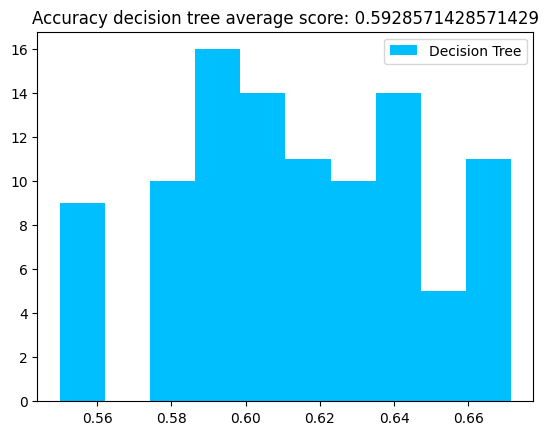

In [ ]:
model_accuracies_dt = []

for repetition in range(100):
    inputs_train, inputs_test, target_train, target_test = train_test_split(inputs_n,target,test_size=0.15,random_state=42)

    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(inputs_test, target_test)
    dt_classifier_accuracy = dt_classifier.score(inputs_train, target_train)
    model_accuracies_dt.append(dt_classifier_accuracy)

fig, ax = plt.subplots()

plt.hist(model_accuracies_dt, label ='Decision Tree', color = "deepskyblue")
plt.title('Accuracy decision tree average score: {}'.format(np.average(dt_classifier_accuracy)));
plt.legend()
plt.show()

K-NN

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.2, random_state=42)

In [ ]:
# initializing and train the model
k = 5
model = KNeighborsClassifier(n_neighbors = k)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
# evaluate the model
time_i = time.time()
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
time_f = time.time()
execution_time = time_f - time_i
print('train score:', train_score)
print('test score:', test_score)
print('execution time:', execution_time)

train score: 0.8181818181818182
test score: 0.7272727272727273
execution time: 0.033776283264160156


In [ ]:
mean_score(X_test, y_test, 100)

('test score: 0.7200000000000003', 'execution time: 0.008448400497436524')

In [ ]:
# additional evaluation metrics
time_i = time.time()
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classi_report = classification_report(y_test, y_pred)
time_f = time.time()
execution_time = time_f - time_i
print('accuracy score:', acc)
print('confusion matrix:\n', conf_matrix)
print('classification report:\n', classi_report)
print('execution time:', execution_time)

accuracy score: 0.7272727272727273
confusion matrix:
 [[ 7  6]
 [ 3 17]]
classification report:
               precision    recall  f1-score   support

        Dies       0.70      0.54      0.61        13
       Lives       0.74      0.85      0.79        20

    accuracy                           0.73        33
   macro avg       0.72      0.69      0.70        33
weighted avg       0.72      0.73      0.72        33

execution time: 0.027424097061157227


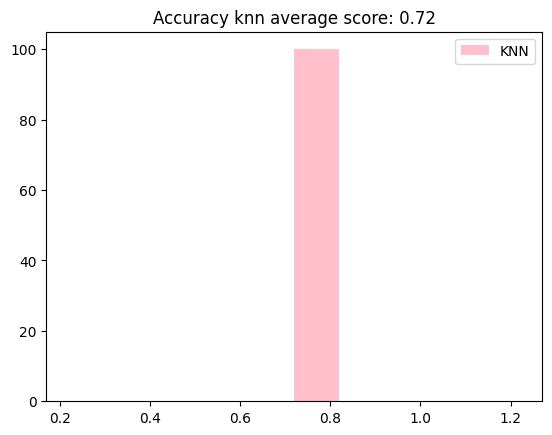

In [ ]:
model_accuracies_knn = []

for repetition in range(100):
    inputs_train, inputs_test, target_train, target_test = train_test_split(inputs_n,target,test_size=0.15,random_state=42)

    knn_classifier = KNeighborsClassifier()
    knn_classifier.fit(inputs_train, target_train.values.ravel())
    knn_classifier_accuracy = knn_classifier.score(inputs_test, target_test.values.ravel())
    model_accuracies_knn.append(knn_classifier_accuracy)

plt.hist(model_accuracies_knn, label='KNN', color= 'pink')
plt.title('Accuracy knn average score: {}'.format(np.average(knn_classifier_accuracy)));
plt.legend()
plt.show()

### Teste 2

In [ ]:
inputs_n2 = copy.deepcopy(inputs_n)

for category in df_clean:
  if unknown_cat[category] > 40:
    del inputs_n2[category + "_n"]
inputs_n2.shape

(165, 41)

Decision Tree

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(inputs_n2, target, test_size= 0.2, random_state= 42)

In [ ]:
# initialize and train the model
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# evaluate the model
time_i = time.time()
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
time_f = time.time()
execution_time = time_f - time_i
print('train score:', train_score)
print('test score:', test_score)
print('execution time:', execution_time)

train score: 1.0
test score: 0.6363636363636364
execution time: 0.0155792236328125


In [ ]:
mean_score(X_test, y_test, 100)

('test score: 0.6299999999999986', 'execution time: 0.005864908695220947')

In [ ]:
# additional evaluation metrics
time_i = time.time()
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classi_report = classification_report(y_test, y_pred)
time_f = time.time()
execution_time = time_f - time_i
print('accuracy score:', acc)
print('confusion matrix:\n', conf_matrix)
print('classification report:\n', classi_report)
print('execution time:', execution_time)

accuracy score: 0.6363636363636364
confusion matrix:
 [[10  3]
 [ 9 11]]
classification report:
               precision    recall  f1-score   support

        Dies       0.53      0.77      0.62        13
       Lives       0.79      0.55      0.65        20

    accuracy                           0.64        33
   macro avg       0.66      0.66      0.64        33
weighted avg       0.68      0.64      0.64        33

execution time: 0.02532815933227539


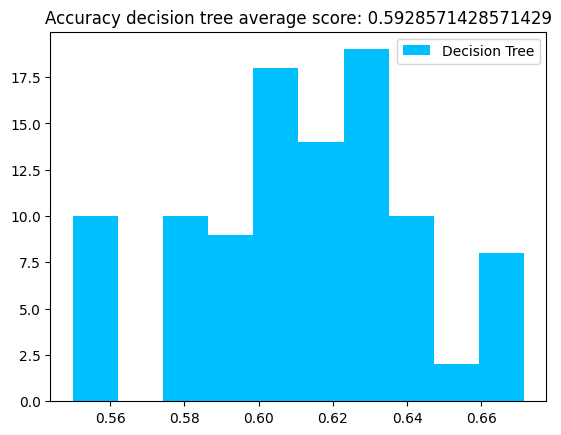

In [ ]:
model_accuracies_dt_2 = []

for repetition in range(100):
    inputs_train_2, inputs_test_2, target_train_2, target_test_2 = train_test_split(inputs_n2,target,test_size=0.15,random_state=42)

    dt_classifier_2 = DecisionTreeClassifier()
    dt_classifier_2.fit(inputs_test_2, target_test_2)
    dt_classifier_accuracy_2 = dt_classifier_2.score(inputs_train_2, target_train_2)
    model_accuracies_dt_2.append(dt_classifier_accuracy_2)

plt.hist(model_accuracies_dt_2, label ='Decision Tree', color = "deepskyblue")
plt.title('Accuracy decision tree average score: {}'.format(np.average(dt_classifier_accuracy_2)));
plt.legend()
plt.show()

K-NN

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(inputs_n2, target, test_size=0.2, random_state=42)

In [ ]:
# initializing and train the model
k = 5
model = KNeighborsClassifier(n_neighbors = k)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
# evaluate the model
time_i = time.time()
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
time_f = time.time()
execution_time = time_f - time_i
print('train score:', train_score)
print('test score:', test_score)
print('execution time:', execution_time)

train score: 0.8333333333333334
test score: 0.7575757575757576
execution time: 0.04858112335205078


In [ ]:
mean_score(X_test, y_test, 100)

('test score: 0.7499999999999991', 'execution time: 0.00963954210281372')

In [ ]:
# additional evaluation metrics
time_i = time.time()
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classi_report = classification_report(y_test, y_pred)
time_f = time.time()
execution_time = time_f - time_i
print('accuracy score:', acc)
print('confusion matrix:\n', conf_matrix)
print('classification report:\n', classi_report)
print('execution time:', execution_time)

accuracy score: 0.7575757575757576
confusion matrix:
 [[ 8  5]
 [ 3 17]]
classification report:
               precision    recall  f1-score   support

        Dies       0.73      0.62      0.67        13
       Lives       0.77      0.85      0.81        20

    accuracy                           0.76        33
   macro avg       0.75      0.73      0.74        33
weighted avg       0.75      0.76      0.75        33

execution time: 0.0329279899597168


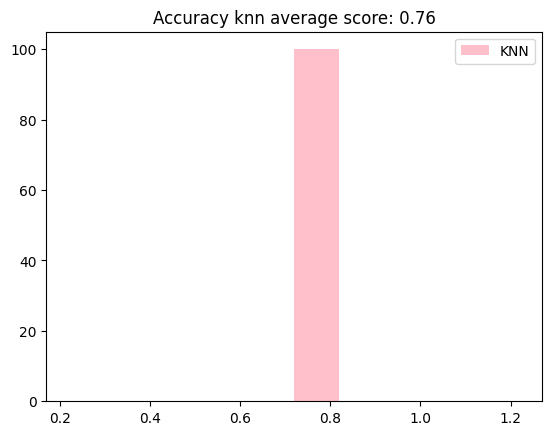

In [ ]:
model_accuracies_knn_2 = []

for repetition in range(100):
    inputs_train_2, inputs_test_2, target_train_2, target_test_2 = train_test_split(inputs_n2,target,test_size=0.15,random_state=42)

    knn_classifier_2 = KNeighborsClassifier()
    knn_classifier_2.fit(inputs_train_2, target_train_2.values.ravel())
    knn_classifier_accuracy_2 = knn_classifier_2.score(inputs_test_2, target_test_2.values.ravel())
    model_accuracies_knn_2.append(knn_classifier_accuracy_2)

plt.hist(model_accuracies_knn, label='KNN', color= 'pink')
plt.title('Accuracy knn average score: {}'.format(np.average(knn_classifier_accuracy_2)));
plt.legend()
plt.show()

### Teste 3

In [ ]:
inputs_n3 = copy.deepcopy(inputs_n)

for category in df_clean:
  if unknown_cat[category] > 20:
    del inputs_n3[category + "_n"]
inputs_n3.shape

(165, 36)

Decision Tree

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(inputs_n3, target, test_size= 0.2, random_state= 42)

In [ ]:
# initialize and train the model
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# evaluate the model
time_i = time.time()
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
time_f = time.time()
execution_time = time_f - time_i
print('train score:', train_score)
print('test score:', test_score)
print('execution time:', execution_time)

train score: 1.0
test score: 0.6666666666666666
execution time: 0.02162790298461914


In [ ]:
mean_score(X_test, y_test, 100)

('test score: 0.6599999999999991', 'execution time: 0.005701286792755127')

In [ ]:
# additional evaluation metrics
time_i = time.time()
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classi_report = classification_report(y_test, y_pred)
time_f = time.time()
execution_time = time_f - time_i
print('accuracy score:', acc)
print('confusion matrix:\n', conf_matrix)
print('classification report:\n', classi_report)
print('execution time:', execution_time)

accuracy score: 0.6666666666666666
confusion matrix:
 [[10  3]
 [ 8 12]]
classification report:
               precision    recall  f1-score   support

        Dies       0.56      0.77      0.65        13
       Lives       0.80      0.60      0.69        20

    accuracy                           0.67        33
   macro avg       0.68      0.68      0.67        33
weighted avg       0.70      0.67      0.67        33

execution time: 0.021953344345092773


### Confusion matrix:


Assumindo que o teste 3 apresenta os melhores resultados de 'test score', apresenta-se a 'confusion matrix' para o mesmo. Com esta é possível verificar a precisão do algoritmo, ou seja, comparar o valor previsto com o valor real.

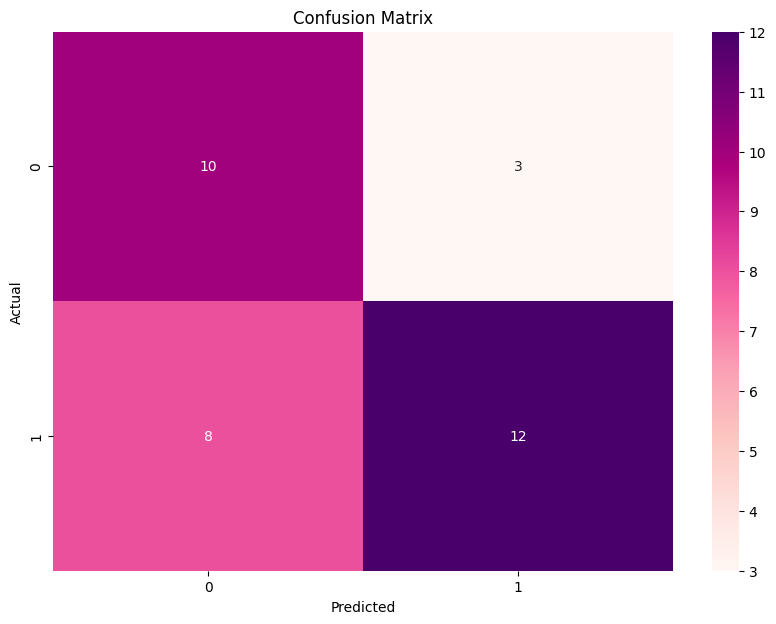

In [ ]:
# confusion matrix for Decision Tree
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

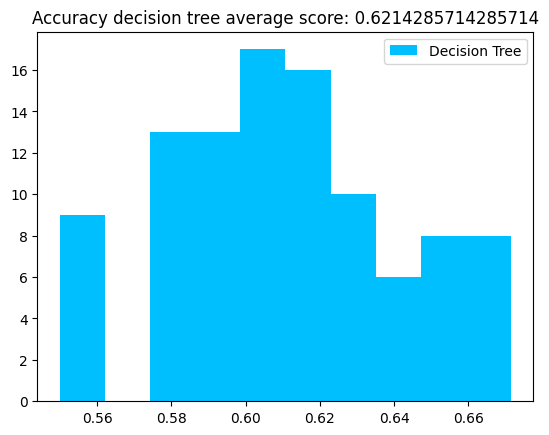

In [ ]:
model_accuracies_dt_3 = []

for repetition in range(100):
    inputs_train_3, inputs_test_3, target_train_3, target_test_3 = train_test_split(inputs_n3,target,test_size=0.15,random_state=42)

    dt_classifier_3 = DecisionTreeClassifier()
    dt_classifier_3.fit(inputs_test_3, target_test_3)
    dt_classifier_accuracy_3 = dt_classifier_3.score(inputs_train_3, target_train_3)
    model_accuracies_dt_3.append(dt_classifier_accuracy_3)

plt.hist(model_accuracies_dt_3, label ='Decision Tree', color = "deepskyblue")
plt.title('Accuracy decision tree average score: {}'.format(np.average(dt_classifier_accuracy_3)));
plt.legend()
plt.show()

K-NN

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(inputs_n3, target, test_size=0.2, random_state=42)

In [ ]:
# initializing and train the model
k = 5
model = KNeighborsClassifier(n_neighbors = k)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
# evaluate the model
time_i = time.time()
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
time_f = time.time()
execution_time = time_f - time_i
print('train score:', train_score)
print('test score:', test_score)
print('execution time:', execution_time)

train score: 0.8333333333333334
test score: 0.7575757575757576
execution time: 0.07727909088134766


In [ ]:
mean_score(X_test, y_test, 100)

('test score: 0.7499999999999991', 'execution time: 0.014160909652709962')

In [ ]:
# additional evaluation metrics
time_i = time.time()
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classi_report = classification_report(y_test, y_pred)
time_f = time.time()
execution_time = time_f - time_i
print('accuracy score:', acc)
print('confusion matrix:\n', conf_matrix)
print('classification report:\n', classi_report)
print('execution time:', execution_time)

accuracy score: 0.7575757575757576
confusion matrix:
 [[ 8  5]
 [ 3 17]]
classification report:
               precision    recall  f1-score   support

        Dies       0.73      0.62      0.67        13
       Lives       0.77      0.85      0.81        20

    accuracy                           0.76        33
   macro avg       0.75      0.73      0.74        33
weighted avg       0.75      0.76      0.75        33

execution time: 0.04203629493713379


### Confusion matrix:

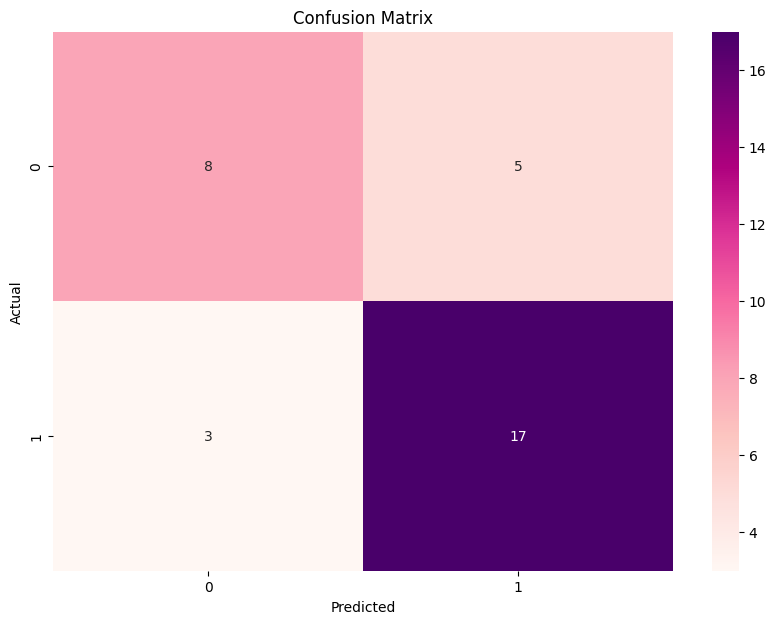

In [ ]:
# confusion matrix for K-NN
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

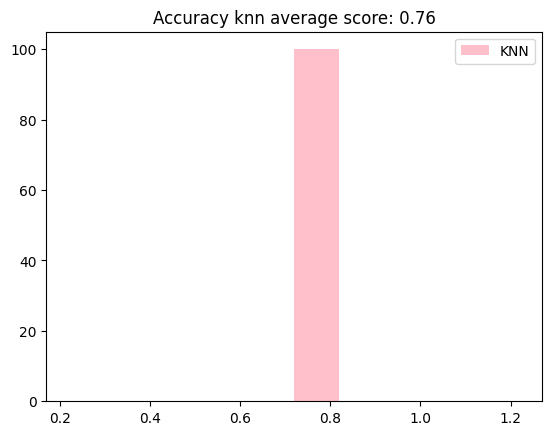

In [ ]:
model_accuracies_knn_3 = []

for repetition in range(100):
    inputs_train_3, inputs_test_3, target_train_3, target_test_3 = train_test_split(inputs_n3,target,test_size=0.15,random_state=42)

    knn_classifier_3 = KNeighborsClassifier()
    knn_classifier_3.fit(inputs_train_3, target_train_3.values.ravel())
    knn_classifier_accuracy_3 = knn_classifier_3.score(inputs_test_3, target_test_3.values.ravel())
    model_accuracies_knn_3.append(knn_classifier_accuracy_3)

plt.hist(model_accuracies_knn, label='KNN', color= 'pink')
plt.title('Accuracy knn average score: {}'.format(np.average(knn_classifier_accuracy_2)));
plt.legend()
plt.show()

### Grid Search

Aplicando o método de 'Grid Search' pretendemos obter os melhores valores de hiperparâmetros de modo chegarmos ao melhor 'test score'.

- Decision Tree

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
}

In [ ]:
grid_search_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=10, n_jobs=-1, scoring= "accuracy")

X_train, X_test, y_train, y_test = train_test_split(inputs_n3, target, test_size=0.2, random_state=42)

grid_search_grid.fit(X_train, y_train)

best_params_grid = grid_search_grid.best_params_
best_model_grid = grid_search_grid.best_estimator_
test_score_grid = best_model_grid.score(X_test, y_test)

cv_results_grid = grid_search_grid.cv_results_
mean_scores_dt = cv_results_grid['mean_test_score']
std_scores_dt = cv_results_grid['std_test_score']

In [ ]:
print("Decision Tree - Best Hyperparameters:", best_params_grid)
print("Decision Tree - Test Score:", test_score_grid)

Decision Tree - Best Hyperparameters: {'criterion': 'gini', 'max_depth': 40, 'max_leaf_nodes': 30}
Decision Tree - Test Score: 0.696969696969697


- K-NN

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [ ]:
grid_search_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=10, n_jobs=-1, scoring= "accuracy")

X_train, X_test, y_train, y_test = train_test_split(inputs_n3, target, test_size=0.2, random_state=42)

grid_search_grid.fit(X_train, y_train)

best_params_grid = grid_search_grid.best_params_
best_model_grid = grid_search_grid.best_estimator_
test_score_grid = best_model_grid.score(X_test, y_test)

cv_results_grid = grid_search_grid.cv_results_
mean_scores_dt = cv_results_grid['mean_test_score']
std_scores_dt = cv_results_grid['std_test_score']

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print("K-NN - Best Hyperparameters:", best_params_grid)
print("K-NN - Test Score:", test_score_grid)

Decision Tree - Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Decision Tree - Test Score: 0.6666666666666666


###4th test

In [ ]:
inputs_n4 = copy.deepcopy(inputs_n)

for category in df_clean:
  if unknown_cat[category] > 10:
    del inputs_n4[category + "_n"]
inputs_n4.shape

(165, 29)

Decision Tree

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(inputs_n4, target, test_size= 0.2, random_state= 42)

In [ ]:
# initialize and train the model
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# evaluate the model
time_i = time.time()
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
time_f = time.time()
execution_time = time_f - time_i
print('train score:', train_score)
print('test score:', test_score)
print('execution time:', execution_time)

train score: 1.0
test score: 0.5151515151515151
execution time: 0.013753890991210938


In [ ]:
mean_score(X_test, y_test, 100)

('test score: 0.5100000000000003', 'execution time: 0.005998415946960449')

In [ ]:
# additional evaluation metrics
time_i = time.time()
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classi_report = classification_report(y_test, y_pred)
time_f = time.time()
execution_time = time_f - time_i
print('accuracy score:', acc)
print('confusion matrix:\n', conf_matrix)
print('classification report:\n', classi_report)
print('execution time:', execution_time)

accuracy score: 0.5151515151515151
confusion matrix:
 [[ 8  5]
 [11  9]]
classification report:
               precision    recall  f1-score   support

        Dies       0.42      0.62      0.50        13
       Lives       0.64      0.45      0.53        20

    accuracy                           0.52        33
   macro avg       0.53      0.53      0.51        33
weighted avg       0.56      0.52      0.52        33

execution time: 0.027478933334350586


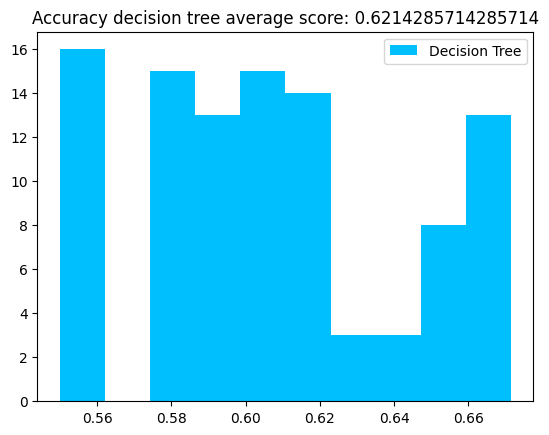

In [ ]:
model_accuracies_dt_4 = []

for repetition in range(100):
    inputs_train_4, inputs_test_4, target_train_4, target_test_4 = train_test_split(inputs_n4,target,test_size=0.15,random_state=42)

    dt_classifier_4 = DecisionTreeClassifier()
    dt_classifier_4.fit(inputs_test_4, target_test_4)
    dt_classifier_accuracy_4 = dt_classifier_4.score(inputs_train_4, target_train_4)
    model_accuracies_dt_4.append(dt_classifier_accuracy_4)

plt.hist(model_accuracies_dt_4, label ='Decision Tree', color="deepskyblue")
plt.title('Accuracy decision tree average score: {}'.format(np.average(dt_classifier_accuracy_3)));
plt.legend()
plt.show()

K-NN

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(inputs_n4, target, test_size=0.2, random_state=42)

In [ ]:
# initializing and train the model
k = 5
model = KNeighborsClassifier(n_neighbors = k)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
# evaluate the model
time_i = time.time()
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
time_f = time.time()
execution_time = time_f - time_i
print('train score:', train_score)
print('test score:', test_score)
print('execution time:', execution_time)

train score: 0.8106060606060606
test score: 0.7272727272727273
execution time: 0.036075592041015625


In [ ]:
mean_score(X_test, y_test, 100)

('test score: 0.7200000000000003', 'execution time: 0.009067330360412598')

In [ ]:
# additional evaluation metrics
time_i = time.time()
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classi_report = classification_report(y_test, y_pred)
time_f = time.time()
execution_time = time_f - time_i
print('accuracy score:', acc)
print('confusion matrix:\n', conf_matrix)
print('classification report:\n', classi_report)
print('execution time:', execution_time)

accuracy score: 0.7272727272727273
confusion matrix:
 [[ 7  6]
 [ 3 17]]
classification report:
               precision    recall  f1-score   support

        Dies       0.70      0.54      0.61        13
       Lives       0.74      0.85      0.79        20

    accuracy                           0.73        33
   macro avg       0.72      0.69      0.70        33
weighted avg       0.72      0.73      0.72        33

execution time: 0.026925086975097656


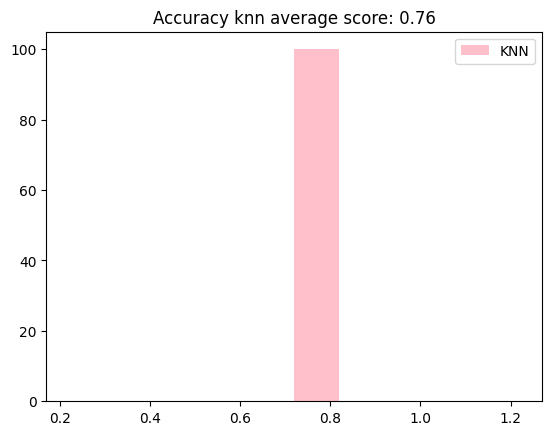

In [ ]:
model_accuracies_knn_4 = []

for repetition in range(100):
    inputs_train_4, inputs_test_4, target_train_4, target_test_4 = train_test_split(inputs_n4,target,test_size=0.15,random_state=42)

    knn_classifier_4 = KNeighborsClassifier()
    knn_classifier_4.fit(inputs_train_4, target_train_4.values.ravel())
    knn_classifier_accuracy_4 = knn_classifier_4.score(inputs_test_4, target_test_4.values.ravel())
    model_accuracies_knn_4.append(knn_classifier_accuracy_4)

plt.hist(model_accuracies_knn, label='KNN', color= 'pink')
plt.title('Accuracy knn average score: {}'.format(np.average(knn_classifier_accuracy_2)));
plt.legend()
plt.show()

##Comparação de resultados


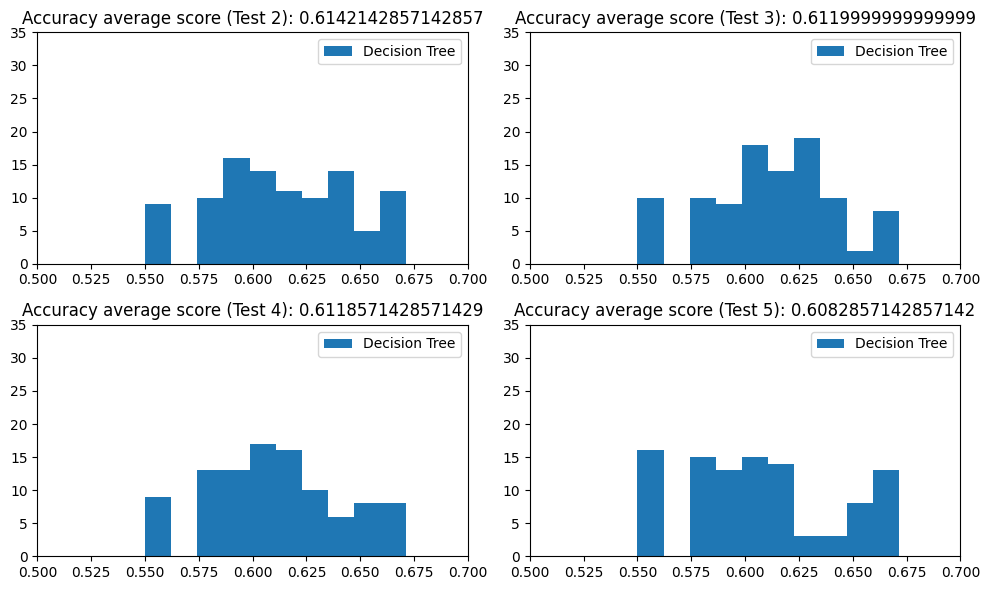

In [ ]:
model_accuracies_dt = [model_accuracies_dt, model_accuracies_dt_2, model_accuracies_dt_3, model_accuracies_dt_4]
fig, axs = plt.subplots(2, 2, figsize=(10, 6))  # Ajustar o tamanho da figura

# Plotar cada um dos gráficos em um subplot diferente
for i, model_accuracy in enumerate(model_accuracies_dt):
    axs[i // 2, i % 2].set_xlim([0.5, 0.7])  # Definir limites do eixo x
    axs[i // 2, i % 2].set_ylim([0, 35])
    axs[i // 2, i % 2].hist(model_accuracy, label='Decision Tree')
    axs[i // 2, i % 2].set_title('Accuracy average score (Test {}): {}'.format(i+2, np.average(model_accuracy)))
    axs[i // 2, i % 2].legend()

plt.tight_layout()
plt.show()

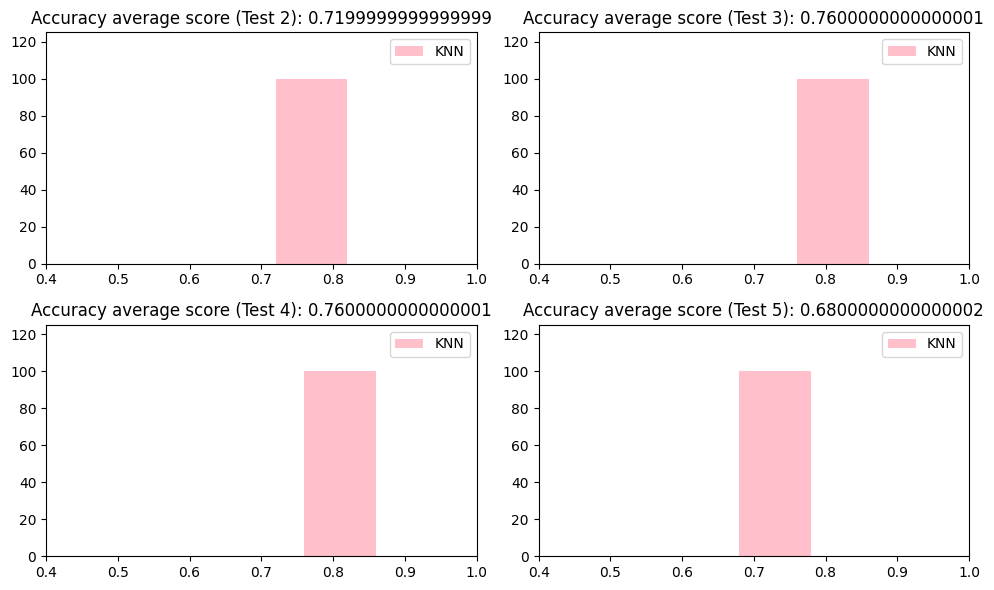

In [ ]:
model_accuracies_knn = [model_accuracies_knn, model_accuracies_knn_2, model_accuracies_knn_3, model_accuracies_knn_4]
fig, axs = plt.subplots(2, 2, figsize=(10, 6))  # Ajustar o tamanho da figura

# Plotar cada um dos gráficos em um subplot diferente
for i, model_accuracy in enumerate(model_accuracies_knn):
    axs[i // 2, i % 2].set_xlim([0.4, 1.0])  # Definir limites do eixo x
    axs[i // 2, i % 2].set_ylim([0, 125])
    axs[i // 2, i % 2].hist(model_accuracy, label='KNN', color= 'pink')
    axs[i // 2, i % 2].set_title('Accuracy average score (Test {}): {}'.format(i+2, np.average(model_accuracy)))
    axs[i // 2, i % 2].legend()

plt.tight_layout()
plt.show()

# Conclusão
[[voltar ao índice]](#Indice)
##### No processo de classificação realizado neste estudo, foram conduzidos 4 testes abrangendo diferentes aspetos, desde a configuração dos dados até à aplicação de algoritmos de machine learning, como a 'Decision Tree' e o K-NN. Ao longo destes testes, observou-se que não houve grandes discrepâncias nos valores de pontuação média de precisão da árvore de decisão, que se manteve em torno de 0,62. Quanto ao K-NN, o teste 3 apresentou o valor mais alto de precisão média, atingindo 0,76, após a remoção de certos parâmetros (nomeadamente, a remoção das colunas que possuiam mais '?')
##### Em relação a 'accuracy', verificamos que o teste 3 revelou-se o melhor teste em que se obteve 0,82 para a Decision Tree e 0,76 para o K-NN. Desta forma, utilizando o teste 3, empregou-se a técnica grid search, alcançando um score de 0,70 para a dt e 0,67 para o K-NN

##### Estas conclusões destacam a importância de realizar uma análise cuidadosa dos dados, incluindo a exclusão de atributos redundantes, além de ressaltar a necessidade de ajuste de parâmetros para obter um desempenho otimizado dos modelos de clasificação usados.





